In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb
from xgboost import plot_importance
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split
from category_encoders import LeaveOneOutEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.utils import shuffle
from featexp import get_univariate_plots
%matplotlib inline

Using TensorFlow backend.


In [7]:
traindata=pd.read_csv(r"C:\Users\danie\OneDrive\桌面\資料科學final\train_dataset.csv",header=0, engine='python')
trainlabel=pd.read_csv(r"C:\Users\danie\OneDrive\桌面\資料科學final\train_label.csv",header=0, engine='python')
testdata=pd.read_csv(r"C:\Users\danie\OneDrive\桌面\資料科學final\test_dataset.csv",header=0, engine='python')

In [8]:
trainlabel['readmitted']=trainlabel['readmitted'].map({'NO':0,'<30':1,'>30':2})

In [335]:
trainlabel['readmitted'].value_counts()

0    44006
2    28362
1     9044
Name: readmitted, dtype: int64

In [9]:
trainlabel=trainlabel['readmitted']

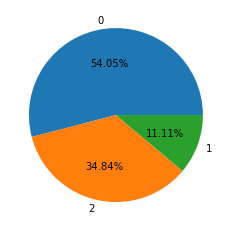

In [337]:
plt.pie(x =trainlabel.value_counts(),autopct='%.2f%%',labels=pd.Series(trainlabel.value_counts().index).map({1:'1',0:'0',2:'2'}))
plt.show()

In [10]:
traindata=pd.concat([traindata,trainlabel],axis=1)

encounter_id is categorical. Categorical features not supported yet.
patient_nbr is categorical. Categorical features not supported yet.
race is categorical. Categorical features not supported yet.
gender is categorical. Categorical features not supported yet.
age is categorical. Categorical features not supported yet.
weight is categorical. Categorical features not supported yet.
                                     Plots for admission_type_id                                      


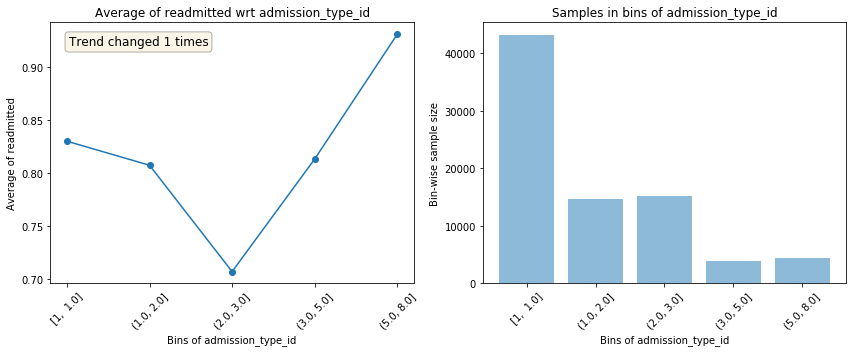

--------------------------------------------------------------------------------------------------------------


                                  Plots for discharge_disposition_id                                  


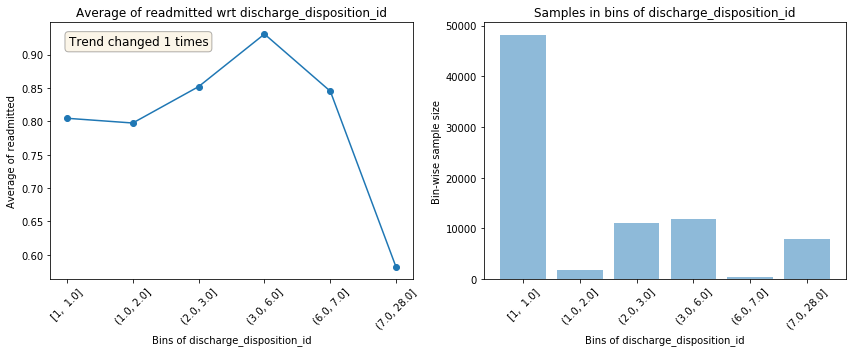

--------------------------------------------------------------------------------------------------------------


                                    Plots for admission_source_id                                     


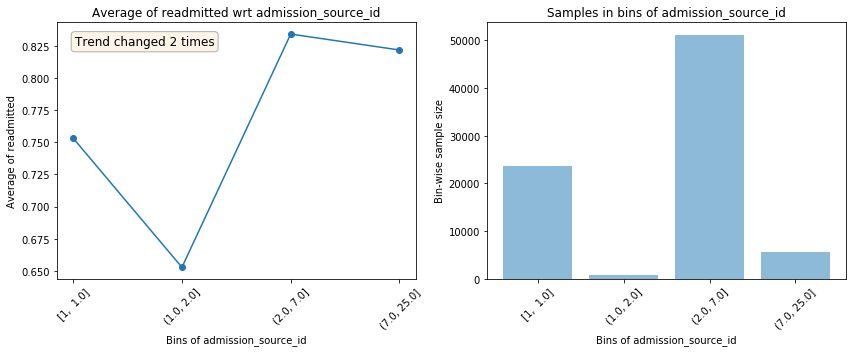

--------------------------------------------------------------------------------------------------------------


                                      Plots for time_in_hospital                                      


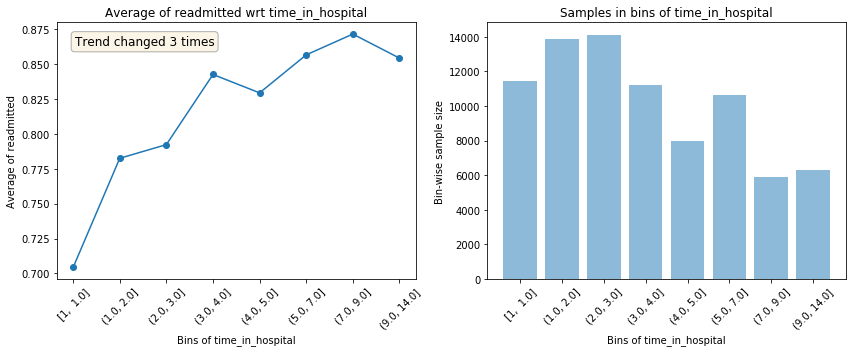

--------------------------------------------------------------------------------------------------------------


payer_code is categorical. Categorical features not supported yet.
medical_specialty is categorical. Categorical features not supported yet.
                                     Plots for num_lab_procedures                                     


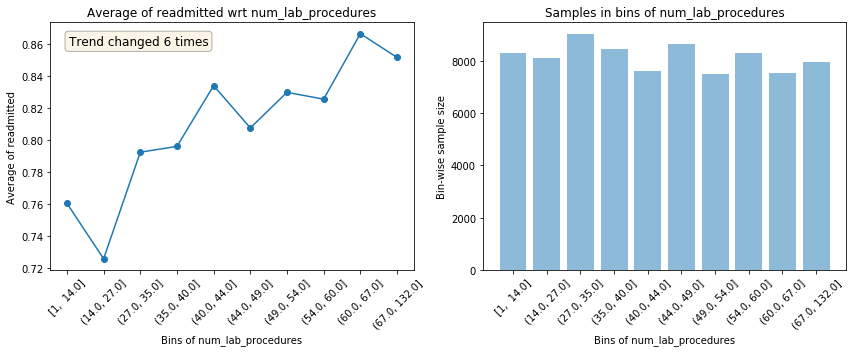

--------------------------------------------------------------------------------------------------------------


                                       Plots for num_procedures                                       


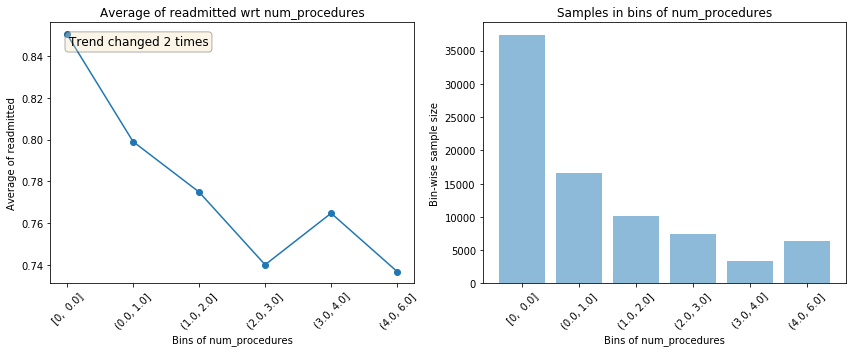

--------------------------------------------------------------------------------------------------------------


                                      Plots for num_medications                                       


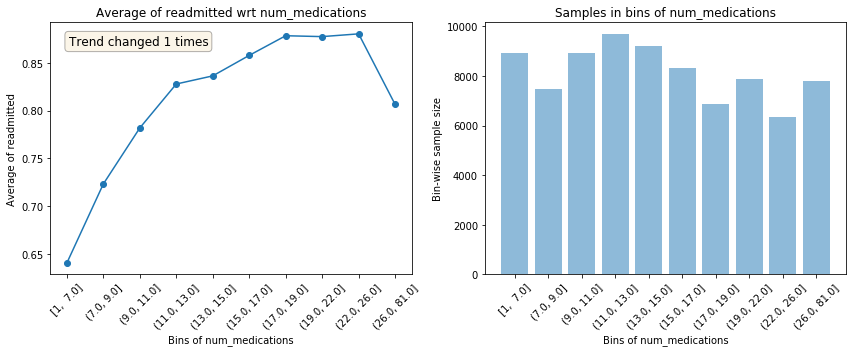

--------------------------------------------------------------------------------------------------------------


                                     Plots for number_outpatient                                      


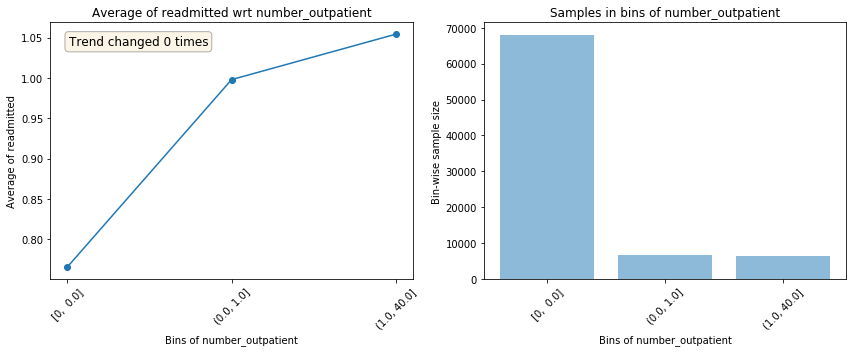

--------------------------------------------------------------------------------------------------------------


                                      Plots for number_emergency                                      


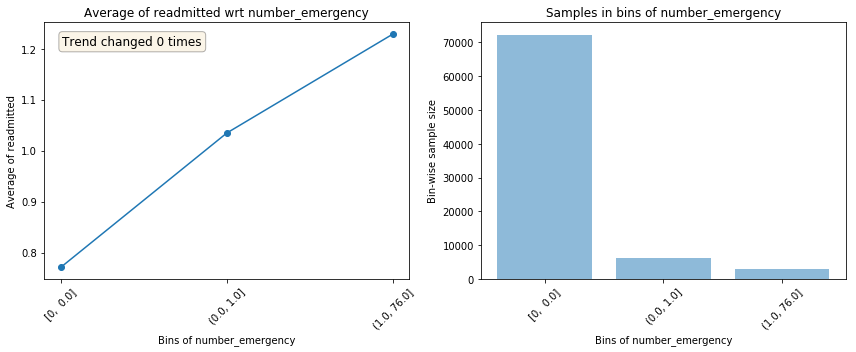

--------------------------------------------------------------------------------------------------------------


                                      Plots for number_inpatient                                      


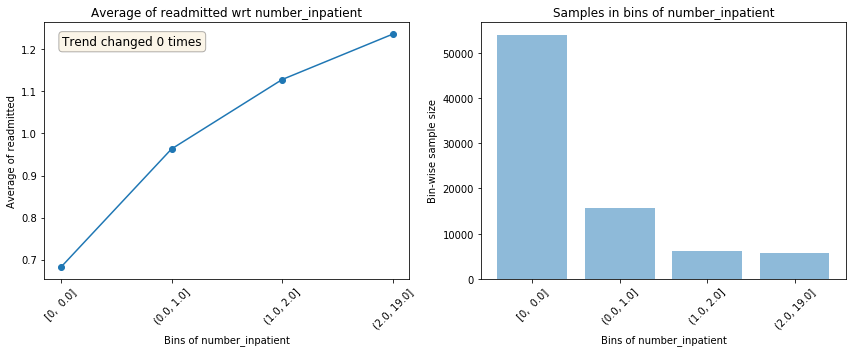

--------------------------------------------------------------------------------------------------------------


diag_1 is categorical. Categorical features not supported yet.
diag_2 is categorical. Categorical features not supported yet.
diag_3 is categorical. Categorical features not supported yet.
                                      Plots for number_diagnoses                                      


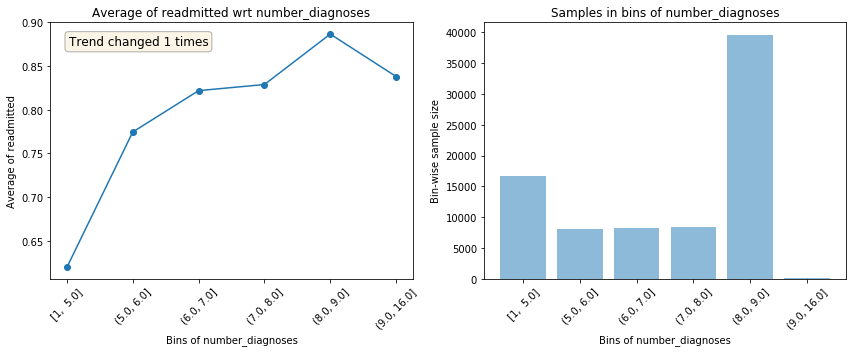

--------------------------------------------------------------------------------------------------------------


max_glu_serum is categorical. Categorical features not supported yet.
A1Cresult is categorical. Categorical features not supported yet.
metformin is categorical. Categorical features not supported yet.
repaglinide is categorical. Categorical features not supported yet.
nateglinide is categorical. Categorical features not supported yet.
chlorpropamide is categorical. Categorical features not supported yet.
glimepiride is categorical. Categorical features not supported yet.
acetohexamide is categorical. Categorical features not supported yet.
glipizide is categorical. Categorical features not supported yet.
glyburide is categorical. Categorical features not supported yet.
tolbutamide is categorical. Categorical features not supported yet.
pioglitazone is categorical. Categorical features not supported yet.
rosiglitazone is categorical. Categorical features not supported yet.
a

In [11]:
get_univariate_plots(data=traindata, target_col='readmitted')

In [338]:
column=['diag_1','diag_2','diag_3']
for col in column:
    for i in range(len(traindata[col])):
        try:
            traindata[col][i]=int(traindata[col][i]) 
        except:
            traindata[col][i]=1001
            
    for j in range(len(testdata[col])):
        try:
            testdata[col][j]=int(testdata[col][j]) 
        except:
            testdata[col][j]=1001

C:\Users\danie\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\danie\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\danie\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\danie\Anaconda3\lib

In [267]:
diag1_temp=traindata.groupby(['diag_1'],as_index=False)['readmitted'].mean()
diag2_temp=traindata.groupby(['diag_2'],as_index=False)['readmitted'].mean()
diag3_temp=traindata.groupby(['diag_3'],as_index=False)['readmitted'].mean()

In [268]:
diag1_temp.columns=['diag_1','diag_1_mean']
diag2_temp.columns=['diag_2','diag_2_mean']
diag3_temp.columns=['diag_3','diag_3_mean']

In [339]:
for col in column:
    traindata[col]=pd.cut(traindata[col], bins = list(range(0,1021,20)))
    testdata[col]=pd.cut(testdata[col], bins = list(range(0,1021,20)))

In [340]:
for col in column:
    traindata[col]=traindata[col].astype('str')
    testdata[col]=testdata[col].astype('str')

In [183]:
column=['diag_1','diag_2','diag_3']
for col in column:
    loo_encoder = LeaveOneOutEncoder(cols=col)
    loo_X = loo_encoder.fit_transform(traindata[col], trainlabel)
    traindata[col]=loo_X
    loo_X = loo_encoder.transform(testdata[col])
    testdata[col]=loo_X

In [ ]:
# columns=['admission_type_id', 'discharge_disposition_id', 'admission_source_id']

In [92]:
temp=traindata.groupby(['discharge_disposition_id'],as_index=False)['readmitted'].mean()

In [93]:
temp.columns=['discharge_disposition_id','discharge_disposition_mean']

In [ ]:
traindata['encounter_id']=[word[:2] for word in traindata['encounter_id']]
temp2=traindata.groupby(['encounter_id'],as_index=False)['readmitted'].mean()

In [ ]:
temp2.columns=['encounter_id','encounter_id_mean']

In [ ]:
train_num=len(traindata)
traindata=traindata.drop(['readmitted'],axis=1)

In [ ]:
alldata=pd.concat([traindata,testdata],axis=0).reset_index(drop=True)

In [273]:
alldata=pd.merge(alldata,diag1_temp,on='diag_1',how='left')
alldata=alldata.drop(['diag_1'],axis=1)
alldata=pd.merge(alldata,diag2_temp,on='diag_2',how='left')
alldata=alldata.drop(['diag_2'],axis=1)
alldata=pd.merge(alldata,diag3_temp,on='diag_3',how='left')
alldata=alldata.drop(['diag_3'],axis=1)

In [97]:
alldata=pd.merge(alldata,temp,on='discharge_disposition_id',how='left')
alldata=alldata.drop(['discharge_disposition_id'],axis=1)

In [ ]:
alldata['encounter_id']=[word[:2] for word in alldata['encounter_id']]
alldata=pd.merge(alldata,temp2,on='encounter_id',how='left')
alldata=alldata.drop(['encounter_id'],axis=1)

In [ ]:
###test data有些症狀是再train沒出現的
for col in column:
    alldata.loc[alldata[col].isna(),col]=alldata[col].mean()
    alldata.loc[alldata[col].isna(),col]=alldata[col].mean()
    alldata.loc[alldata[col].isna(),col]=alldata[col].mean()

In [274]:
###test data有些症狀是在train沒出現的
for col in column:
    alldata.loc[alldata['diag_1_mean'].isna(),'diag_1_mean']=alldata['diag_1_mean'].mean()
    alldata.loc[alldata['diag_2_mean'].isna(),'diag_2_mean']=alldata['diag_2_mean'].mean()
    alldata.loc[alldata['diag_3_mean'].isna(),'diag_3_mean']=alldata['diag_3_mean'].mean()

In [ ]:
# column=['diag_1','diag_2','diag_3']
# for col in column:
#     for i in range(len(alldata[col])):
#         try:
#             alldata[col][i]=int(alldata[col][i]) 
#         except:
#             alldata[col][i]=1001

In [ ]:
# for col in column:
#     alldata[col]=pd.cut(alldata[col], bins = list(range(0,1051,100)))

In [ ]:
# for col in column:
#     loo_encoder = LeaveOneOutEncoder(cols=col)
#     loo_X = loo_encoder.fit_transform(alldata.loc[:train_num-1,col], trainlabel)
#     loo_X = pd.concat([loo_X,loo_encoder.transform(alldata.loc[train_num:,col])],axis=0)
#     alldata[col]=loo_X[col]

In [59]:
alldata['age']=alldata['age'].map({'[0-10)':1,'[10-20)':2,'[20-30)':3,'[30-40)':4, '[40-50)':5, '[50-60)':6, '[60-70)':7, '[70-80)':8, '[80-90)':9,'[90-100)':10})
alldata['gender']=alldata['gender'].map({'Female':0,'Male':1, 'Unknown/Invalid':-99})

In [60]:
column=['age','gender']
for col in column:
    loo_encoder = LeaveOneOutEncoder(cols=col)
    loo_X = loo_encoder.fit_transform(alldata.loc[:train_num-1,col], trainlabel)
    loo_X = pd.concat([loo_X,loo_encoder.transform(alldata.loc[train_num:,col])],axis=0)
    alldata[col]=loo_X[col]

In [186]:
for col in alldata.iloc[:,24:47].columns:
    alldata.loc[:,col]=alldata.loc[:,col].map({'Up':3,'Down':2,'Steady':1,'No':0})

In [187]:
alldata['drugs']=np.sum(alldata.iloc[:,24:47]!=0,axis=1)

In [188]:
for col in alldata.iloc[:,24:47].columns:
    alldata.loc[:,col]=alldata.loc[:,col].astype('str')

In [191]:
pca=PCA(n_components=3)
pcadf=pd.DataFrame(pca.fit_transform(alldata.iloc[:,24:47]),columns=['PCA1','PCA2','PCA3'])

In [192]:
# alldata=alldata.drop(alldata.iloc[:,23:46].columns,axis=1)
alldata=pd.concat([alldata,pcadf],axis=1)

In [ ]:
# alldata['diag_1']=alldata['diag_1'].apply(lambda x:x.strip("V"))
# alldata['diag_1']=alldata['diag_1'].apply(lambda x:x.strip("E"))
# alldata['diag_1'][alldata['diag_1']=='?']=0
# alldata['diag_2']=alldata['diag_2'].apply(lambda x:x.strip("V"))
# alldata['diag_2']=alldata['diag_2'].apply(lambda x:x.strip("E"))
# alldata['diag_2'][alldata['diag_2']=='?']=0
# alldata['diag_3']=alldata['diag_3'].apply(lambda x:x.strip("V"))
# alldata['diag_3']=alldata['diag_3'].apply(lambda x:x.strip("E"))
# alldata['diag_3'][alldata['diag_3']=='?']=0

# alldata['diag_1']=alldata['diag_1'].astype('float64')
# alldata['diag_2']=alldata['diag_2'].astype('float64')
# alldata['diag_3']=alldata['diag_3'].astype('float64')

In [342]:
alldata=alldata.drop(['encounter_id','payer_code','medical_specialty','weight','patient_nbr'],axis=1)

In [343]:
# # 種類 2 種以下的類別型欄位轉標籤編碼做 Label Encoding
le = LabelEncoder()

# 檢查每一個 column
for col in alldata:
    if alldata[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(alldata[col].unique())) <= 2:
            # 就做 Label Encoder
            le.fit(alldata[col])
            alldata[col] = le.transform(alldata[col])
            
            
# 標籤編碼 (2種類別) 欄位轉 One Hot Encoding            
alldata = pd.get_dummies(alldata)

In [344]:
alldata.head()

,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,...,tolazamide_Steady,tolazamide_Up,insulin_Down,insulin_No,insulin_Steady,insulin_Up,glyburide.metformin_Down,glyburide.metformin_No,glyburide.metformin_Steady,glyburide.metformin_Up
0,1,22,4,9,74,1,22,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,3,3,1,4,48,0,12,1,0,2,...,0,0,0,0,1,0,0,1,0,0
2,5,11,17,3,12,1,18,0,1,0,...,0,0,0,1,0,0,0,1,0,0
3,2,1,4,2,19,6,14,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,1,1,7,8,48,1,24,2,0,1,...,0,0,0,0,1,0,0,0,1,0


In [ ]:
# alldata['admission_type']=alldata['admission_type_id']*alldata['admission_source_id']

In [ ]:
alldata=alldata.replace('?',np.nan)

In [ ]:
# folds =  StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

# columns=['admission_type','race']

# for training_index, validation_index in folds:
#     temp=pd.concat([traindata,trainlabel],axis=1)
#     x_train = temp.iloc[training_index]
#     x_validation = temp.iloc[validation_index]
#     for column in columns:
#         means = x_validation[column].map(x_train.groupby(column)['readmitted'].mean())
#         x_validation[coulmn + "_mean_target"] = means
#         # train_new is a dataframe copy we made of the training data
#         train_new.iloc[value_index] = x_validation

In [68]:
race = pd.get_dummies(alldata.loc[:,'race'])
alldata=pd.concat([alldata,race],axis=1)

In [ ]:
for col in ['race']:
    loo_encoder = LeaveOneOutEncoder(cols=col)
    loo_X = loo_encoder.fit_transform(alldata.loc[:train_num-1,col], trainlabel)
    loo_X = pd.concat([loo_X,loo_encoder.transform(alldata.loc[train_num:,col])],axis=0)
    alldata[col]=loo_X[col]

In [69]:
alldata['max_glu_serum']=alldata['max_glu_serum'].map({'None':0,'Norm':0,'>200':1,'>300':2})
alldata['A1Cresult']=alldata['A1Cresult'].map({'None':0,'Norm':0,'>7':1,'>8':2})

In [169]:
alldata.dtypes

admission_type_id           float64
discharge_disposition_id    float64
admission_source_id         float64
time_in_hospital              int64
num_lab_procedures            int64
                             ...   
insulin_3                     uint8
glyburide.metformin_0         uint8
glyburide.metformin_1         uint8
glyburide.metformin_2         uint8
glyburide.metformin_3         uint8
Length: 108, dtype: object

In [72]:
alldata=alldata.drop(['race'],axis=1)

In [ ]:
alldata=alldata.drop(['encounter_id','payer_code','medical_specialty','weight','patient_nbr'],axis=1)

In [75]:
alldata['change']=alldata['change'].map({'No':0, 'Ch':1})
alldata['diabetesMed']=alldata['diabetesMed'].map({'No':0, 'Yes':1})

In [ ]:
alldata.head()

In [ ]:
le = LabelEncoder()
for col in ['patient_nbr','admission_type','race','weight','payer_code','medical_specialty']:
    alldata[col]=le.fit_transform(alldata[col])

In [279]:
alldata['visits']=alldata['number_outpatient']+alldata['number_emergency']+alldata['number_inpatient']
# alldata=alldata.drop(['number_outpatient','number_emergency','number_inpatient'],axis=1)

In [88]:
from keras.models import Sequential  
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense, Dropout

In [89]:
scaler= MinMaxScaler(feature_range = (0, 1))

In [90]:
alldata2=scaler.fit_transform(alldata)

In [91]:
alldata2=pd.DataFrame(alldata2)
alldata

,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,...,PCA1,PCA2,PCA3,?,AfricanAmerican,Asian,Caucasian,Hispanic,Other,visits
0,0.824251,0.772518,0.830007,0.801246,0.517843,9,74,1,22,0,...,-0.863885,-0.302873,-0.058766,0,0,0,1,0,0,0
1,0.788842,0.846202,0.707199,0.852116,0.753251,4,48,0,12,1,...,0.134986,-0.270701,-0.062952,1,0,0,0,0,0,3
2,0.788868,0.682405,0.813808,0.000000,0.827593,3,12,1,18,0,...,-0.882525,-0.166429,0.784774,0,0,0,1,0,0,1
3,0.788868,0.811400,0.807434,0.804669,0.517843,2,19,6,14,0,...,0.134986,-0.270701,-0.062952,1,0,0,0,0,0,0
4,0.824205,0.772374,0.829961,0.804627,0.869161,8,48,1,24,2,...,0.135713,-0.274852,-0.066217,0,1,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,0.788847,0.846209,0.829988,0.804652,0.869185,1,37,0,10,0,...,-0.884594,0.648542,-0.036838,0,0,0,1,0,0,2
101762,0.788847,0.843375,0.829988,0.231013,0.869185,3,45,0,26,1,...,1.017774,0.609291,-1.654201,0,0,0,1,0,0,2
101763,0.824232,0.787891,0.829988,0.802395,0.869185,14,69,0,16,0,...,1.033595,2.874359,-0.536343,0,0,0,1,0,0,0
101764,0.824232,0.843375,0.707219,0.804652,0.753262,3,31,2,24,0,...,1.133858,-0.238530,-0.067138,0,0,0,1,0,0,0


In [92]:
traindata=alldata2[:train_num].reset_index(drop=True)
testdata=alldata2[train_num:].reset_index(drop=True)

In [345]:
alldata.columns=[col.replace('<','') for col in alldata.columns]
alldata.columns=[col.replace('>','') for col in alldata.columns]
alldata.columns=[col.replace('[','') for col in alldata.columns]
alldata.columns=[col.replace(']','') for col in alldata.columns]

In [356]:
traindata=alldata[:train_num].reset_index(drop=True)
testdata=alldata[train_num:].reset_index(drop=True)

In [347]:
train_X, val_X, train_Y, val_Y = train_test_split(traindata, trainlabel, test_size=0.2)

In [134]:
smt = SMOTE(random_state=20)
traindata_smote, trainlabel_smote = smt.fit_sample(traindata, trainlabel)

In [131]:
model=Sequential()
model.add(Dense(512,input_dim=54,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(3,activation='softmax'))
model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_39 (Dense)             (None, 512)               28160     
_________________________________________________________________
dense_40 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_41 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_42 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_43 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_44 (Dense)             (None, 3)                 771       
Total params: 357,635
Trainable params: 357,635
Non-trainable params: 0
________________________________________________

In [132]:
trainlabel_smote=pd.get_dummies(trainlabel_smote)

training_model = model.fit（x = traindata_smote，y = trainlabel_smote，validation_split = 0.2，epochs = 50，batch_size = 1024，verbose = 2，）

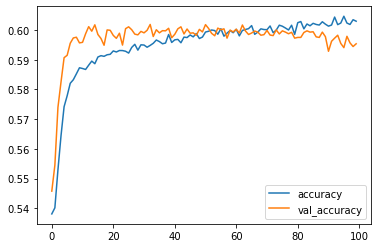

In [163]:
plt.plot(training_model.history['accuracy'], label='accuracy')
plt.plot(training_model.history['val_accuracy'], label='val_accuracy')

plt.legend()
plt.show()

In [348]:
xgb_val = xgb.DMatrix(val_X,label=val_Y)
xgb_train = xgb.DMatrix(train_X,label=train_Y)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
min_child_weight= [x for x in np.linspace(0, 2, num = 5)]
subsample = [0.6,0.7,0.8,0.9,1]
colsample_bytree = [0.6,0.7,0.8,0.9,1]
gamma = [0.1,0.2,0.3,0.5]
reg_alpha = [0.1,0.2,0.3,0.5]
reg_lambda = [0.1,0.2,0.3,0.5,0.8,1]

random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_child_weight': min_child_weight,
               'subsample': subsample,
               'colsample_bytree': colsample_bytree,
               'gamma':gamma,
               'reg_alpha':reg_alpha,
               'reg_lambda':reg_lambda,
               'learning_rate': [0.001,0.01,0.05,0.1,0.3,0.5]}

In [ ]:
other_params = {'objective':'multi:softmax','eval_metric':'merror','num_class':3,'booster':'gbtree','seed':42}

model = xgb.XGBRegressor(**other_params)

xgb_random=RandomizedSearchCV(estimator = model, param_distributions = random_grid, n_iter = 1, cv = 3, verbose=100, random_state=42, n_jobs = 3)

xgb_random.fit(train_X, train_Y)

xgb_random.best_params_, xgb_random.best_score_

In [350]:
params={'objective':'multi:softmax','eval_metric':'merror','num_class':3,'booster':'gbtree','nthread':2,'seed':42,'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 1, 
                  'subsample': 0.8, 'colsample_bytree': 0.8, 'gamma': 0, 'reg_alpha': 0, 'reg_lambda': 1}

In [352]:
plst=list(params.items())
num_rounds=200

In [353]:
watchlist=[(xgb_train,'train'),(xgb_val,'val')]
model = xgb.train(plst, xgb_train, num_rounds, watchlist,early_stopping_rounds=50)

[00:52:03] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[00:52:03] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[00:52:03] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[0]	train-merror:0.435305	val-merror:0.431554
Multiple eval metrics have been passed: 'val-merror' will be used for early stopping.

Will train until val-merror hasn't improved in 50 rounds.
[00:52:04] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[00:52:04] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[00:52:04] C:\Users\Administrator\Desktop\xgboost\src\

[00:52:19] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[00:52:19] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=5
[16]	train-merror:0.411967	val-merror:0.408401
[00:52:20] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[00:52:20] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[00:52:20] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[17]	train-merror:0.411767	val-merror:0.409261
[00:52:21] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5


[00:52:36] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[00:52:36] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=5
[00:52:36] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[33]	train-merror:0.407714	val-merror:0.407726
[00:52:37] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=5
[00:52:37] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=5
[00:52:37] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 0 pruned nodes, max_depth=5
[34]	train-merror:0.407699	val-merror:0.407296


[00:52:52] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 0 pruned nodes, max_depth=5
[49]	train-merror:0.40449	val-merror:0.406927
[00:52:53] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 0 pruned nodes, max_depth=5
[00:52:53] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 0 pruned nodes, max_depth=5
[00:52:53] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 0 pruned nodes, max_depth=5
[50]	train-merror:0.404751	val-merror:0.40662
[00:52:54] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 0 pruned nodes, max_depth=5
[00:52:54] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[0

[00:53:09] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=5
[00:53:09] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 0 pruned nodes, max_depth=5
[66]	train-merror:0.400682	val-merror:0.406129
[00:53:10] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_depth=5
[00:53:10] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=5
[00:53:10] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[67]	train-merror:0.400513	val-merror:0.406375
[00:53:11] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5


[00:53:26] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[00:53:26] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 0 pruned nodes, max_depth=5
[00:53:26] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=5
[83]	train-merror:0.397596	val-merror:0.40662
[00:53:27] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[00:53:27] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 0 pruned nodes, max_depth=5
[00:53:27] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=5
[84]	train-merror:0.397288	val-merror:0.406743
[

[00:53:42] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[99]	train-merror:0.394509	val-merror:0.405699
[00:53:42] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[00:53:43] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=5
[00:53:43] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=5
[100]	train-merror:0.394479	val-merror:0.405454
[00:53:43] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 0 pruned nodes, max_depth=5
[00:53:44] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=5

[00:53:58] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 0 pruned nodes, max_depth=5
[00:53:59] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=5
[00:53:59] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_depth=5
[116]	train-merror:0.391653	val-merror:0.406191
[00:53:59] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 0 pruned nodes, max_depth=5
[00:54:00] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 0 pruned nodes, max_depth=5
[00:54:00] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=5
[117]	train-merror:0.391653	val-merror:0.40600

[00:54:15] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=5
[132]	train-merror:0.390103	val-merror:0.405515
[00:54:16] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=5
[00:54:16] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 0 pruned nodes, max_depth=5
[00:54:16] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 0 pruned nodes, max_depth=5
[133]	train-merror:0.390041	val-merror:0.405208
[00:54:17] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=5
[00:54:17] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 0 pruned nodes, max_depth=

[00:54:32] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 34 extra nodes, 0 pruned nodes, max_depth=5
[00:54:32] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=5
[00:54:32] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[149]	train-merror:0.387984	val-merror:0.405945
[00:54:33] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=5
[00:54:33] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=5
[00:54:33] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=5
[150]	train-merror:0.387892	val-merror:0.40619

[00:54:49] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 0 pruned nodes, max_depth=5
[165]	train-merror:0.385865	val-merror:0.406068
[00:54:50] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 0 pruned nodes, max_depth=5
[00:54:50] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 0 pruned nodes, max_depth=5
[00:54:50] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 0 pruned nodes, max_depth=5
[166]	train-merror:0.38588	val-merror:0.405883
[00:54:51] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_depth=5
[00:54:51] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=5

[00:55:06] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 34 extra nodes, 0 pruned nodes, max_depth=5
[00:55:06] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 0 pruned nodes, max_depth=5
[00:55:07] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=5
[182]	train-merror:0.384299	val-merror:0.405208
[00:55:07] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=5
[00:55:07] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 0 pruned nodes, max_depth=5
[00:55:08] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=5
[183]	train-merror:0.384099	val-merror:0.40533

[00:55:24] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 0 pruned nodes, max_depth=5
[198]	train-merror:0.381919	val-merror:0.404839
[00:55:25] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 0 pruned nodes, max_depth=5
[00:55:25] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 0 pruned nodes, max_depth=5
[00:55:25] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 0 pruned nodes, max_depth=5
[199]	train-merror:0.381735	val-merror:0.404655


In [354]:
model.get_score(importance_type='gain')

{'number_emergency': 9.23616266925305,
 'number_outpatient': 6.04458461280156,
 'diabetesMed': 6.201221440670213,
 'time_in_hospital': 2.921340913365279,
 'diag_3_(420, 440': 3.92289752423611,
 'admission_type_id': 3.6174968874232114,
 'num_procedures': 3.3636409251529513,
 'metformin_No': 3.8855582600291254,
 'discharge_disposition_id': 10.741650152532898,
 'diag_2_(240, 260': 3.729492841196968,
 'diag_1_(640, 660': 8.608083837692307,
 'pioglitazone_No': 2.480919750551163,
 'max_glu_serum_None': 3.9653130355555573,
 'age_90-100)': 4.047559003918918,
 'insulin_Up': 2.4228453935423087,
 'age_20-30)': 3.330150878829788,
 'age_80-90)': 3.6803485606622526,
 'race_AfricanAmerican': 2.757522741637864,
 'diag_2_(260, 280': 2.517932135215941,
 'diag_3_(400, 420': 2.4135749812435887,
 'number_inpatient': 28.765489546864607,
 'diag_1_(80, 100': 2.717379172666667,
 'diag_1_(580, 600': 3.167626763448276,
 'num_medications': 2.9845682745084874,
 'num_lab_procedures': 2.7888076682737535,
 'age_50-60

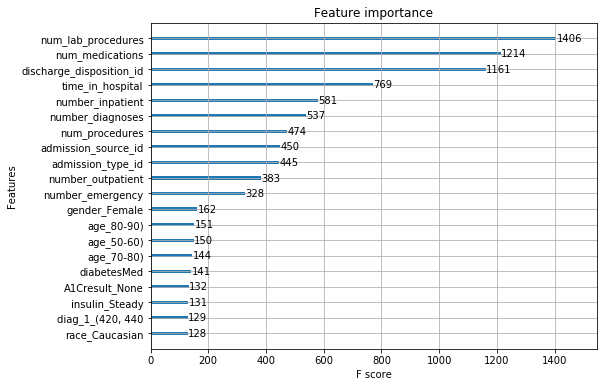

In [355]:
ax =  plot_importance ( model,  max_num_features=20 ) 
ax . figure . set_size_inches (8,6)

In [ ]:
from sklearn.metrics import confusion_matrix
final_test=xgb.DMatrix(final_test_X)
confusion_matrix(model.predict(final_test), final_test_Y, labels=[0,1,2])

In [ ]:
sum(model.predict(final_test)==final_test_Y)/len(final_test_Y)

In [291]:
testdata=xgb.DMatrix(testdata)

In [310]:
predict=model.predict(testdata)

In [311]:
predict=pd.Series(predict).map({0:'NO',1:'<30',2:'>30'})
predict.value_counts()

NO     14221
>30     6001
<30      132
dtype: int64

In [312]:
predict.to_csv(r"C:\Users\danie\OneDrive\桌面\資料科學final\onehot+le_5_50.csv")

C:\Users\danie\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


In [318]:
from sklearn.ensemble import RandomForestClassifier

In [357]:
clf = RandomForestClassifier(n_estimators = 50, max_depth=25, criterion = "gini", min_samples_split=10)  #class_weight= {0:50, 1:1, 2:20}

In [358]:
clf.fit(train_X, train_Y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=25, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [362]:
features = traindata.columns[:20]
importances = clf.feature_importances_[:20]
indices = np.argsort(importances)

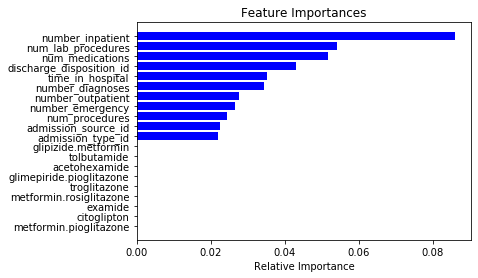

In [363]:
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
print("Cross Validation score: {:.2%}".format(np.mean(cross_val_score(clf, train_X, train_Y, cv=10))))
clf.fit(train_X, train_Y)
# print("Dev Set score: {:.2%}".format(clf.score(val_X, val_Y)))

In [ ]:
print("Dev Set score: {:.2%}".format(clf.score(val_X, val_Y)))

In [ ]:
rfpredict=pd.Series(clf.predict(testdata)).map({0:'NO',1:'<30',2:'>30'})

In [ ]:
rfpredict.value_counts()

In [ ]:
predict.to_csv(r"C:\Users\danie\OneDrive\桌面\資料科學final\rf_le.csv")